In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Basi libraries to manipulate data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for text mining
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
from collections import Counter
from wordcloud import WordCloud
from ast import literal_eval
from textblob import TextBlob #sentiment
from PIL import Image
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Libraries for predictive models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LinearRegression


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Harry Potter and the Philosopher's Stone 🧙🏻‍♂️

<img src='https://cdn.europosters.eu/image/750/harry-potter-philosopher-s-stone-i104639.jpg'
width='150' height='150'>
    

In [3]:
hapot = pd.read_csv(r'C:\Users\gabch\Downloads\dialogues.csv', encoding='latin-1')

In [4]:
print(hapot.columns.values)

['ID_number' 'scene' 'character_name' 'dialogue']


In [5]:
hapot.head()

,ID_number,scene,character_name,dialogue
0,1,1,Albus Dumbledore,"I should have known that you would be here, Pr..."
1,2,1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad."
3,4,1,Minerva McGonagall,And the boy?
4,5,1,Albus Dumbledore,Hagrid is bringing him.


In [6]:
hapot.describe()

,ID_number,scene
count,793.000000,793.000000
mean,397.000000,17.075662
std,229.063674,8.977909
min,1.000000,1.000000
25%,199.000000,10.000000
50%,397.000000,18.000000
75%,595.000000,25.000000
max,793.000000,34.000000


In [7]:
# Popularity of characters
hapot['character_name'].value_counts()

Harry Potter            230
Ron Weasley             120
Hermione Granger         92
Rubeus Hagrid            81
Minerva McGonagall       31
Albus Dumbledore         24
Vernon Dursley           23
Dudley Dursley           17
Quirinus Quirrell        17
Neville Longbottom       14
Petunia Dursley          13
Draco Malfoy             13
Rolanda Hooch            12
Severus Snape             9
Lee Jordan                8
Oliver Wood               8
Voldemort                 8
Sorting Hat               7
Percy Weasley             6
Argus Filch               6
Nearly Headless Nick      5
Seamus Finnigan           5
Fred Weasley              5
Firenze                   5
Molly Weasley             5
Filius Flitwick           4
George Weasley            4
Griphook                  3
Garrick Ollivander        3
Goblin                    2
Class                     2
Tom                       2
Man                       1
Marcus Flint              1
Snake                     1
The Fat Lady        

<Axes: xlabel='count', ylabel='character_name'>

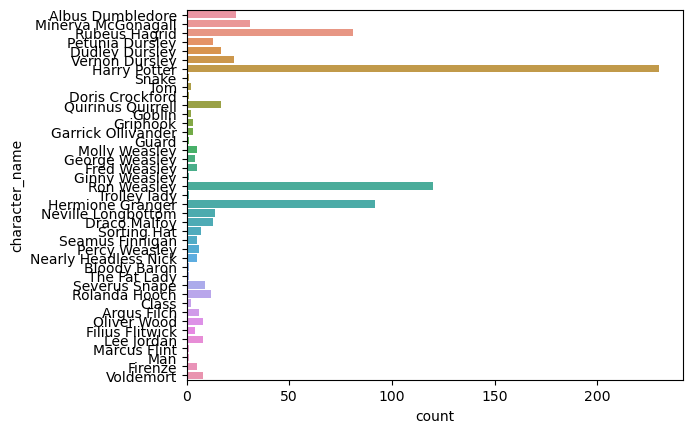

In [8]:
# Graph about character and # lines in dialogue
sns.countplot(y='character_name', data=hapot)

<Axes: xlabel='count', ylabel='character_name'>

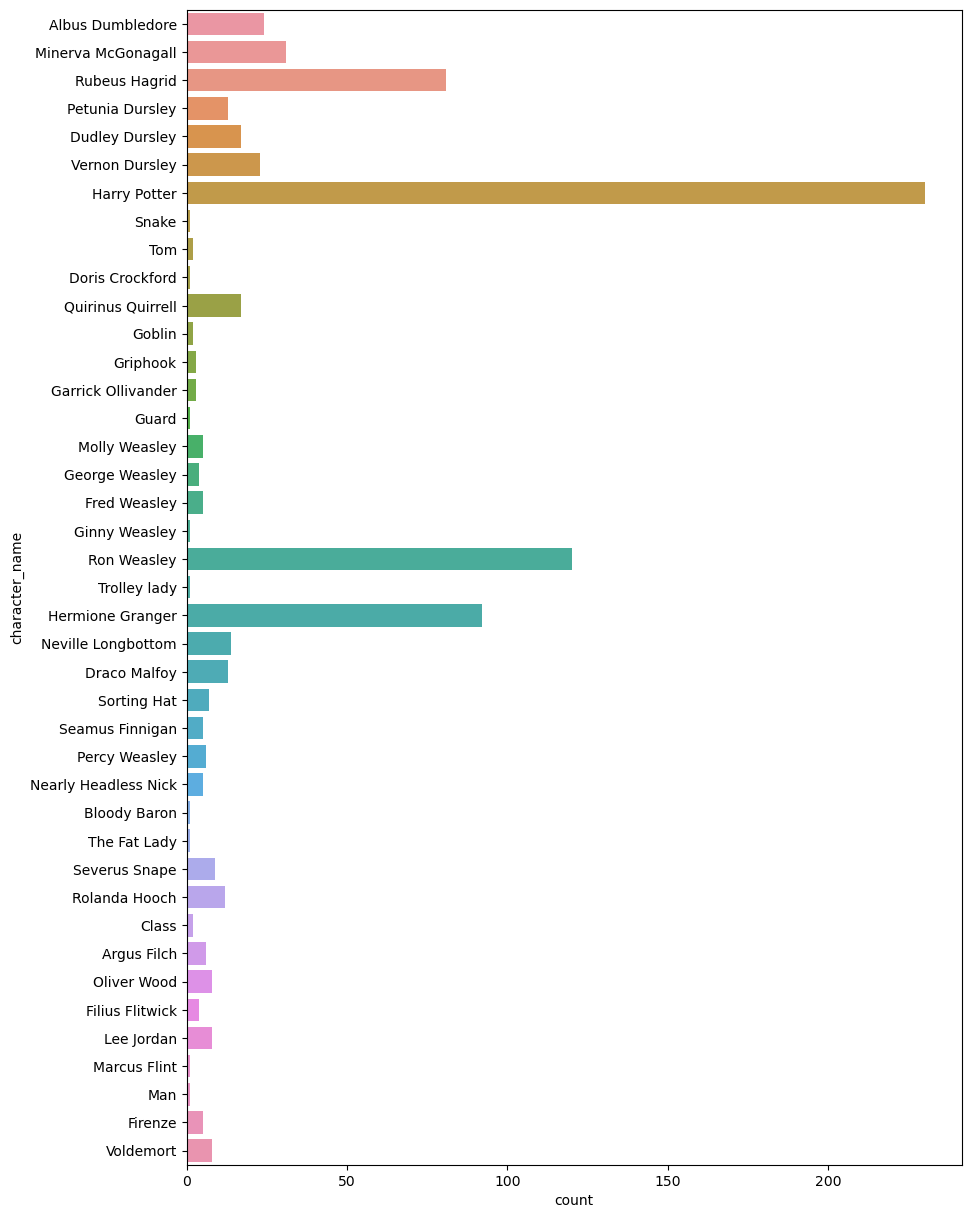

In [9]:
# Adjust the graph visual
plt.figure(figsize=(10,15))
sns.countplot(y='character_name', data=hapot)

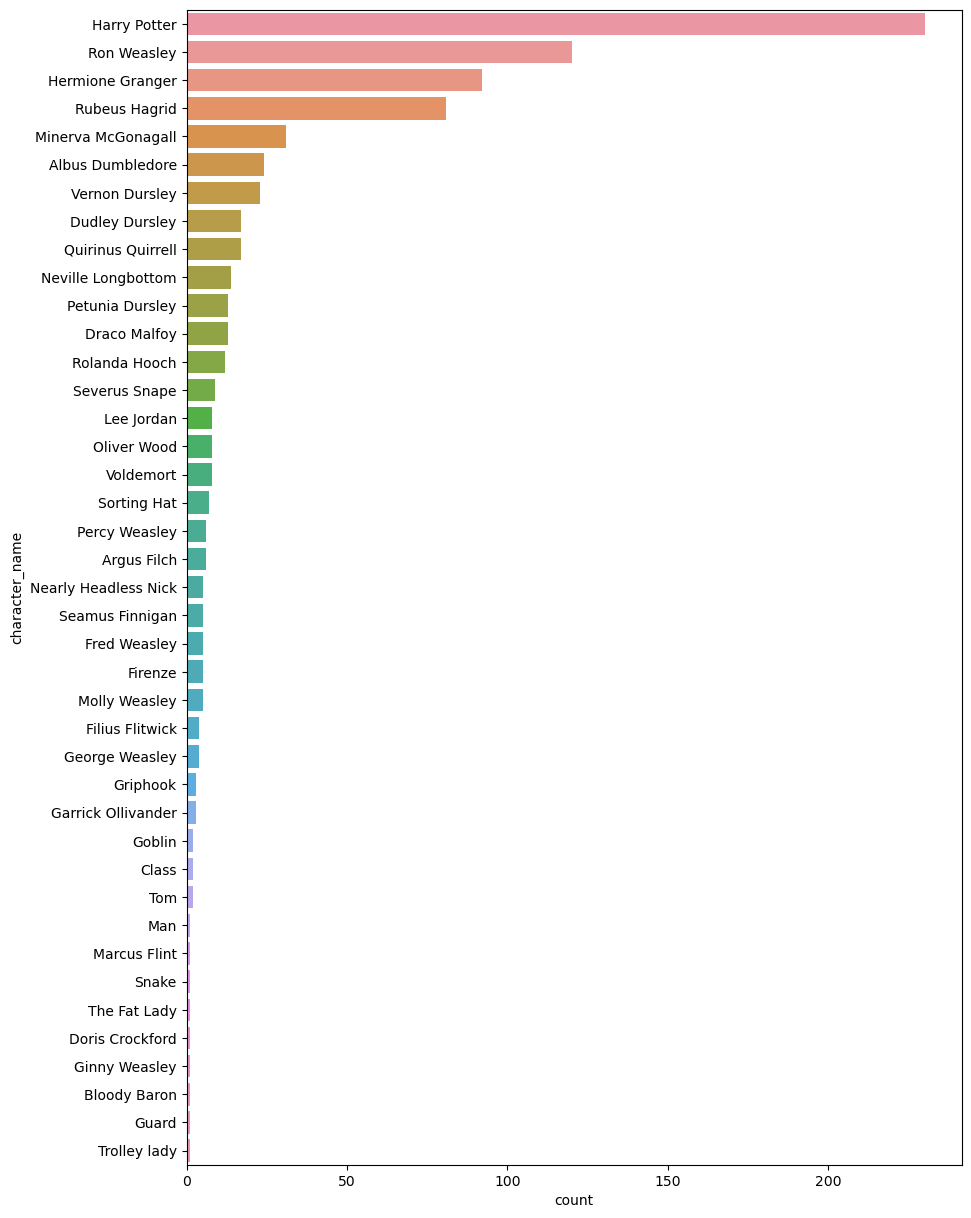

In [10]:
# Order it 
plt.figure(figsize=(10,15))
sns.countplot(y='character_name', data=hapot, order=hapot.character_name.value_counts().index)
plt.show()

In [11]:
hapot['numwords'] = hapot['dialogue'].map(lambda x:len(re.findall(r'\w+',x)))

In [12]:
hapot.head()

,ID_number,scene,character_name,dialogue,numwords
0,1,1,Albus Dumbledore,"I should have known that you would be here, Pr...",11
1,2,1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru...",9
2,3,1,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad.",10
3,4,1,Minerva McGonagall,And the boy?,3
4,5,1,Albus Dumbledore,Hagrid is bringing him.,4


In [13]:
wordsbychar = hapot.groupby('character_name', as_index=False).numwords.sum()
wordsbychar


,character_name,numwords
0,Albus Dumbledore,721
1,Argus Filch,153
2,Bloody Baron,3
3,Class,7
4,Doris Crockford,14
5,Draco Malfoy,214
6,Dudley Dursley,99
7,Filius Flitwick,70
8,Firenze,114
9,Fred Weasley,41


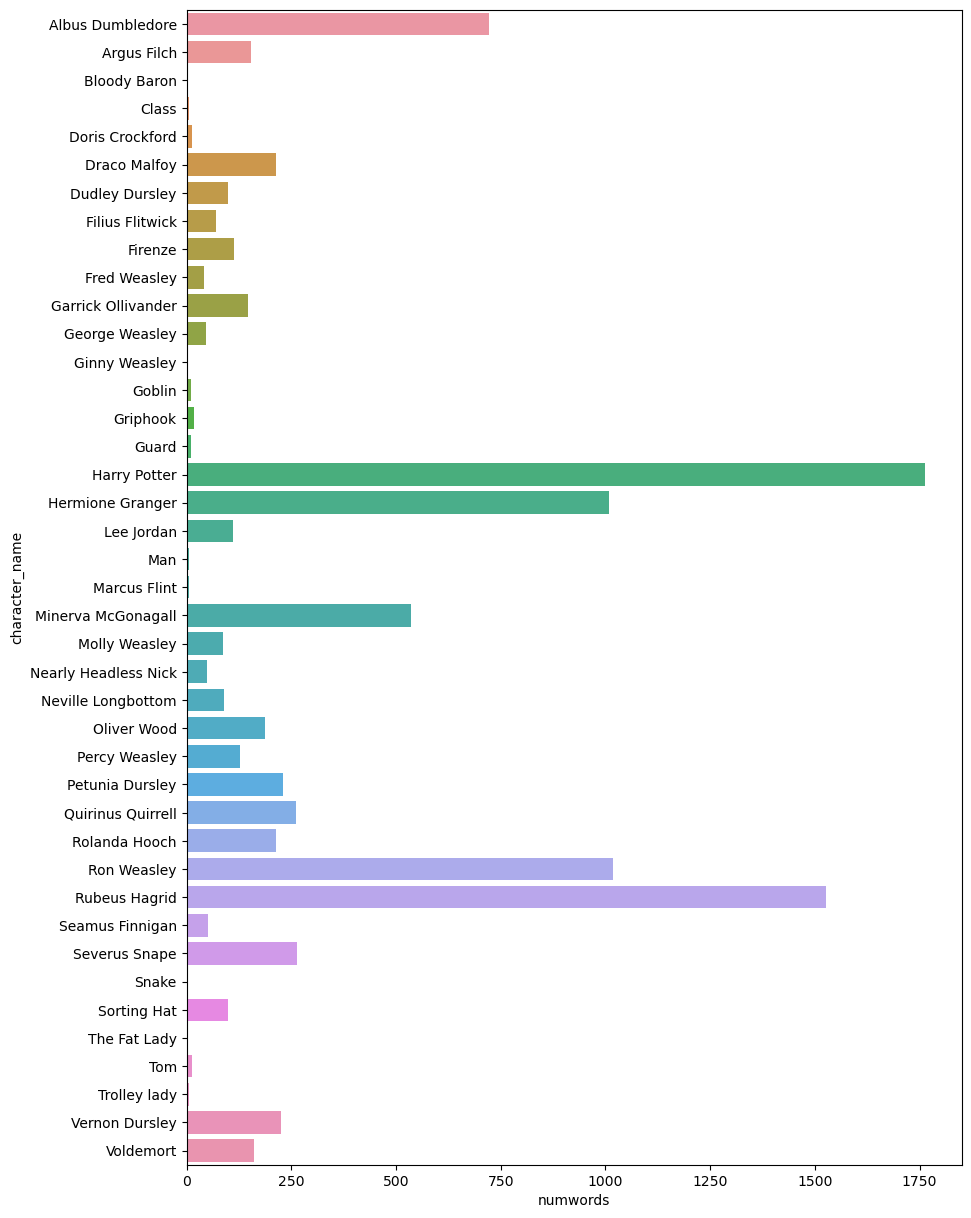

In [14]:
plt.figure(figsize=(10,15))
sns.barplot(x='numwords', y = 'character_name', data=wordsbychar)
plt.show()

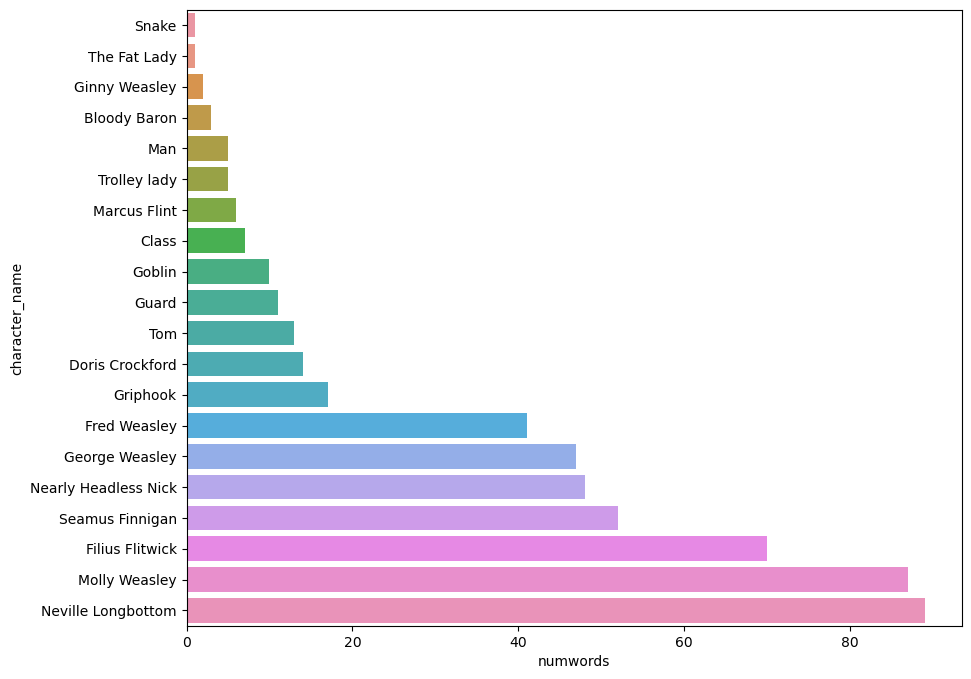

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x='numwords', y = 'character_name', data=wordsbychar,
order=wordsbychar.sort_values('numwords').character_name[0:20],orient='h')
plt.show()

In [16]:
# Lowercase conversion, HTML tag removal, URL removal, digit removal, 
# tokenization, stopword removal, stemming, and lemmatization.

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [PorterStemmer().stem(w) for w in filtered_words]
    lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


In [17]:
hapot.head(20)

,ID_number,scene,character_name,dialogue,numwords
0,1,1,Albus Dumbledore,"I should have known that you would be here, Pr...",11
1,2,1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru...",9
2,3,1,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad.",10
3,4,1,Minerva McGonagall,And the boy?,3
4,5,1,Albus Dumbledore,Hagrid is bringing him.,4
5,6,1,Minerva McGonagall,Do you think it wise to trust Hagrid with some...,14
6,7,1,Albus Dumbledore,"Ah, Professor, I would trust Hagrid with my life.",9
7,8,1,Rubeus Hagrid,"Professor Dumbledore, Sir. Professor McGonagall.",5
8,9,1,Albus Dumbledore,"No problems, I trust, Hagrid?",5
9,10,1,Rubeus Hagrid,"No, Sir. Little tyke fell asleep just as we we...",22


In [18]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabch\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
hapot['clean'] = hapot['dialogue']. map(lambda x: preprocess(x))

In [20]:
topwords = Counter(" ".join(hapot["clean"]).split()).most_common(8)
topwords

[('harry', 88),
 ('know', 50),
 ('one', 48),
 ('see', 45),
 ('potter', 41),
 ('well', 41),
 ('got', 39),
 ('come', 38)]

In [21]:
# Same line as above but sorted
topwords_sorted = sorted(topwords, key=lambda x: x[1])
topwords_sorted


[('come', 38),
 ('got', 39),
 ('potter', 41),
 ('well', 41),
 ('see', 45),
 ('one', 48),
 ('know', 50),
 ('harry', 88)]

In [22]:
text = " ".join(line for line in hapot["clean"])
text

'known would professor mcgonagall good evening professor dumbledore rumours true albus afraid professor good bad boy hagrid bringing think wise trust hagrid something important professor would trust hagrid life professor dumbledore sir professor mcgonagall problems trust hagrid sir little tyke fell asleep flying bristol heh try wake albus really think safe leaving people watched day worst sort muggles imaginable really family boy famous child world know name exactly far better growing away ready hagrid really goodbye good luck harry potter get wake cousin going zoo comes birthday boy happy birthday son cook breakfast try burn anything yes aunt petunia want everything perfect dudley special day hurry bring coffee boy yes uncle vernon wonderful darling many thirty six counted thirty six last year last year thirty seven err yes well quite bit bigger last year care big going going buy two new presents pumpkin lovely day zoo really looking forward warning boy funny business meals week get m

In [23]:
hapot['character_name'].unique()

array(['Albus Dumbledore', 'Minerva McGonagall', 'Rubeus Hagrid',
       'Petunia Dursley', 'Dudley Dursley', 'Vernon Dursley',
       'Harry Potter', 'Snake', 'Tom', 'Doris Crockford',
       'Quirinus Quirrell', 'Goblin', 'Griphook', 'Garrick Ollivander',
       'Guard', 'Molly Weasley', 'George Weasley', 'Fred Weasley',
       'Ginny Weasley', 'Ron Weasley', 'Trolley lady', 'Hermione Granger',
       'Neville Longbottom', 'Draco Malfoy', 'Sorting Hat',
       'Seamus Finnigan', 'Percy Weasley', 'Nearly Headless Nick',
       'Bloody Baron', 'The Fat Lady', 'Severus Snape', 'Rolanda Hooch',
       'Class', 'Argus Filch', 'Oliver Wood', 'Filius Flitwick',
       'Lee Jordan', 'Marcus Flint', 'Man', 'Firenze', 'Voldemort'],
      dtype=object)

In [24]:
hermione = hapot[hapot['character_name']=='Hermione Granger']

In [25]:
count_hermione = Counter(" ".join(hermione['clean']).split()).most_common(5)
count_hermione

[('harry', 11), ('going', 7), ('know', 6), ('stone', 6), ('like', 5)]

In [26]:
# The same list sorted from the less to the most
count_hermione = Counter(" ".join(hermione['clean']).split()).most_common(5)
count_hermione_sorted = sorted(count_hermione, key=lambda x: x[1])
count_hermione_sorted

[('like', 5), ('know', 6), ('stone', 6), ('going', 7), ('harry', 11)]

In [27]:
import random

In [28]:
# Same but with random classement
random.shuffle(count_hermione)
count_hermione

[('harry', 11), ('going', 7), ('know', 6), ('stone', 6), ('like', 5)]

In [29]:
ron = hapot[hapot['character_name']=='Ron Weasley']
ron

,ID_number,scene,character_name,dialogue,numwords,clean
179,180,10,Ron Weasley,"Excuse me, do you mind? Everywhere else is full.",9,excuse mind everywhere else full
181,182,10,Ron Weasley,"I'm Ron, by the way. Ron Weasley.",8,ron way ron weasley
183,184,10,Ron Weasley,"So-so it's true? I mean, do you really have th...",13,true mean really
185,186,10,Ron Weasley,Scar?,1,scar
187,188,10,Ron Weasley,Wicked.,1,wicked
...,...,...,...,...,...,...
723,724,28,Ron Weasley,"You there, D-5! Yes Hermione, I think this is ...",17,yes hermione think going exactly like wizard c...
724,725,28,Ron Weasley,Castle to E-4! Pawn to C-3!,8,castle pawn
726,727,29,Ron Weasley,"You understand right, Harry. Once I make my mo...",22,understand right harry make move queen take fr...
731,732,29,Ron Weasley,Do you wanna stop Snape from getting that ston...,33,wanna stop snape getting stone harry know herm...


In [30]:
count_ron = Counter(" ". join(ron['clean']).split()).most_common(5)
count_ron

[('harry', 17), ('got', 9), ('know', 8), ('one', 7), ('think', 7)]

In [31]:
# Same line but sorted
count_ron_sorted = sorted(count_ron, key=lambda x: x[1])
count_ron_sorted

[('one', 7), ('think', 7), ('know', 8), ('got', 9), ('harry', 17)]

In [32]:
twits = pd.read_csv(r'C:\Users\gabch\Downloads\twits.csv', encoding='latin-1', names = ['label', 'id', 'date', 'flag', 'user', 'text'])

In [33]:
twits.head()

,label,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [34]:
twits = twits.drop(['id', 'date', 'flag', 'user'], axis = 1)

In [35]:
tsamp = twits.sample(n=40000,replace=False)

In [36]:
tsamp['clean']=tsamp['text'].map(lambda x:preprocess(x))

In [37]:
tsamp['clean_count'] = tsamp['clean']. map(lambda x:len(re.findall(r'\w+', x)))
common_twit = tsamp[tsamp['clean_count'] > 4]

In [38]:
common_twit.head()

,label,text,clean,clean_count
616865,0,I need a dose of reality. Im stuck in this fai...,need dose reality stuck fairytale nothing comi...,8
1428490,4,@makaio8688 i see you on the open house party,makaio see open house party,5
705147,0,Who knew it was gunna be 453 smacks to get me ...,knew gunna smacks get today depressing squares...,7
1504692,4,@CraigBarlettani why limit your story to 140 c...,craigbarlettani limit story tell annoying www ...,8
727658,0,"Mascara all over my pillow I also would love,...",mascara pillow also would love anything good l...,14


In [39]:
x_train = common_twit['clean']
y_train = common_twit['label']

In [40]:
x_train.head()

616865     need dose reality stuck fairytale nothing comi...
1428490                          makaio see open house party
705147     knew gunna smacks get today depressing squares...
1504692    craigbarlettani limit story tell annoying www ...
727658     mascara pillow also would love anything good l...
Name: clean, dtype: object

In [41]:
y_train.head()

616865     0
1428490    4
705147     0
1504692    4
727658     0
Name: label, dtype: int64

In [42]:
y_train.unique()

array([0, 4], dtype=int64)

In [43]:
y_train = y_train.replace(4,1)

In [44]:
y_train.unique()

array([0, 1], dtype=int64)

## Predictive models

In [45]:
# Create 90% training test, 10% validation test 
x_train, x_valid, y_train, y_valid = train_test_split (x_train, y_train, test_size=0.1)

In [46]:
tokenizer = RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(x_train.values) + list(x_valid.values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(x_train)
test_vectorized = vectorizer.transform(x_valid)


In [47]:
# Logistic regression 
hapot_vectorized = vectorizer.transform(hapot['clean'])
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg.fit(train_vectorized, y_train)
logreg.score(test_vectorized, y_valid)

0.7409235107507931

In [48]:
# Linear Support Vector Machine (SVC)
linsvc = LinearSVC(max_iter=2000)
linsvc.fit(train_vectorized, y_train)
linsvc.score(test_vectorized, y_valid)

0.7444483609446598

In [49]:
# Bernoulli Naive Bayes classifier
bernb = BernoulliNB()
bernb.fit(train_vectorized, y_train)
bernb.score(test_vectorized, y_valid)

0.7292915051110328

In [50]:
# Create the prediction of the sentiment on the clean message 
preds = logreg.predict(hapot_vectorized)
hapot['sentiment_pred'] = preds
hapot.head()

,ID_number,scene,character_name,dialogue,numwords,clean,sentiment_pred
0,1,1,Albus Dumbledore,"I should have known that you would be here, Pr...",11,known would professor mcgonagall,0
1,2,1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru...",9,good evening professor dumbledore rumours true...,1
2,3,1,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad.",10,afraid professor good bad,0
3,4,1,Minerva McGonagall,And the boy?,3,boy,1
4,5,1,Albus Dumbledore,Hagrid is bringing him.,4,hagrid bringing,1


In [51]:
# Let's make the count of words of messages be filtered to more than 2 words

In [52]:
hapot['clean_count'] = hapot['clean'].map(lambda x:len(re.findall(r'\w+', x)))
hapot_filter = hapot[hapot['clean_count']>2]
hapot_filter.head()

,ID_number,scene,character_name,dialogue,numwords,clean,sentiment_pred,clean_count
0,1,1,Albus Dumbledore,"I should have known that you would be here, Pr...",11,known would professor mcgonagall,0,4
1,2,1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru...",9,good evening professor dumbledore rumours true...,1,7
2,3,1,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad.",10,afraid professor good bad,0,4
5,6,1,Minerva McGonagall,Do you think it wise to trust Hagrid with some...,14,think wise trust hagrid something important,1,6
6,7,1,Albus Dumbledore,"Ah, Professor, I would trust Hagrid with my life.",9,professor would trust hagrid life,1,5


In [53]:
main = hapot_filter['character_name'].value_counts().head(15).reset_index()
main.columns = ['character_name', 'count']
main

,character_name,count
0,Harry Potter,98
1,Rubeus Hagrid,66
2,Ron Weasley,64
3,Hermione Granger,48
4,Albus Dumbledore,21
5,Minerva McGonagall,19
6,Vernon Dursley,14
7,Quirinus Quirrell,13
8,Dudley Dursley,9
9,Draco Malfoy,9


In [54]:
hapot_filter = hapot_filter[hapot_filter.character_name.isin(main['character_name'])]

In [55]:
hapot_filter.head()

,ID_number,scene,character_name,dialogue,numwords,clean,sentiment_pred,clean_count
0,1,1,Albus Dumbledore,"I should have known that you would be here, Pr...",11,known would professor mcgonagall,0,4
1,2,1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru...",9,good evening professor dumbledore rumours true...,1,7
2,3,1,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad.",10,afraid professor good bad,0,4
5,6,1,Minerva McGonagall,Do you think it wise to trust Hagrid with some...,14,think wise trust hagrid something important,1,6
6,7,1,Albus Dumbledore,"Ah, Professor, I would trust Hagrid with my life.",9,professor would trust hagrid life,1,5


In [56]:
# Check the average positivity of messages for each of the top 15 characters
sentimentbychar = hapot_filter.groupby('character_name', as_index=False).sentiment_pred.mean()
sentimentbychar

,character_name,sentiment_pred
0,Albus Dumbledore,0.619048
1,Draco Malfoy,0.444444
2,Dudley Dursley,0.333333
3,Harry Potter,0.428571
4,Hermione Granger,0.479167
5,Lee Jordan,0.375000
6,Minerva McGonagall,0.526316
7,Oliver Wood,0.428571
8,Petunia Dursley,0.666667
9,Quirinus Quirrell,0.538462


In [65]:
# Sort only above 0.5
sentimentbychar_high = [sentimentbychar['sentiment_pred']>0.5]
sentimentbychar_high

[0      True
 1     False
 2     False
 3     False
 4     False
 5     False
 6      True
 7     False
 8      True
 9      True
 10    False
 11     True
 12     True
 13     True
 14     True
 Name: sentiment_pred, dtype: bool]

In [90]:
senti_above_05 = sentimentbychar['sentiment_pred'] > 0.5

# Create a new dataframe with values above 0.5
df_above_05 = sentimentbychar[senti_above_05]

####################################################################
df_sorted = df_above_05.sort_values(by='sentiment_pred')
####################################################################

# Print the resulting dataframe
df_above_05.head()

,character_name,sentiment_pred
0,Albus Dumbledore,0.619048
6,Minerva McGonagall,0.526316
8,Petunia Dursley,0.666667
9,Quirinus Quirrell,0.538462
11,Ron Weasley,0.515625


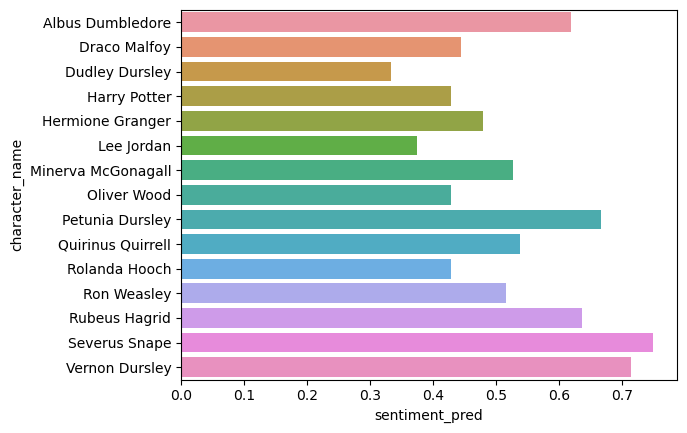

In [59]:
sns.barplot(x='sentiment_pred', y='character_name', data = sentimentbychar)
plt.show()

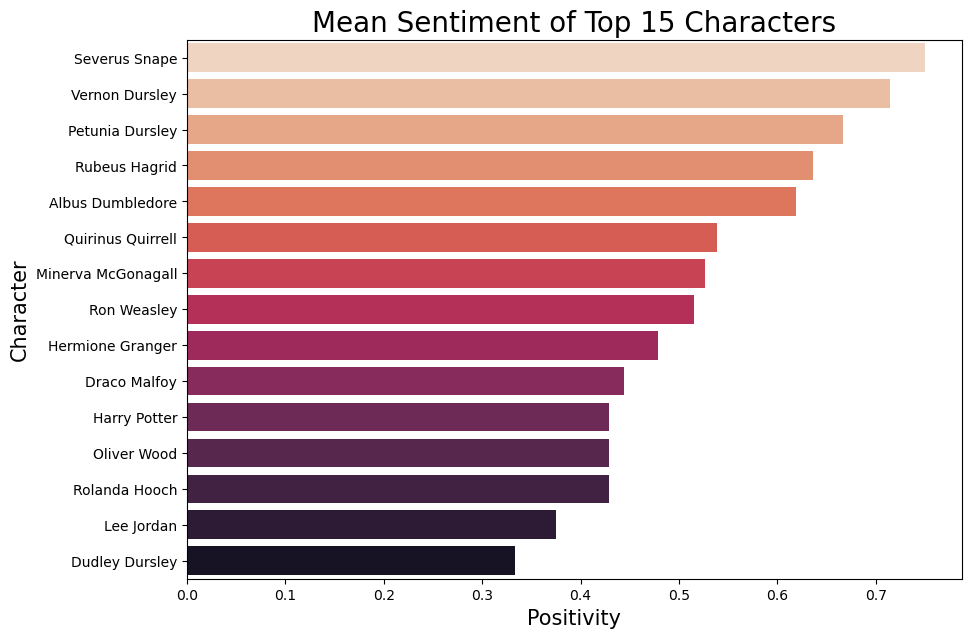

In [62]:
plt.figure(figsize=(10,7))
sns.barplot(x='sentiment_pred', y='character_name', data=sentimentbychar, palette='rocket_r', order=sentimentbychar.sort_values('sentiment_pred', ascending=False).character_name[0:15], orient='h')
plt.xlabel('Positivity', fontsize=15)
plt.ylabel('Character', fontsize=15)
plt.title('Mean Sentiment of Top 15 Characters', fontsize=20)
plt.show()

In [80]:
scene = pd.DataFrame(hapot.groupby('scene', as_index=False).sentiment_pred.mean())
scene

,scene,sentiment_pred
0,1,0.750000
1,2,0.542857
2,3,0.583333
3,4,0.666667
4,5,0.733333
5,6,0.714286
6,7,0.800000
7,8,0.363636
8,9,0.666667
9,10,0.656250


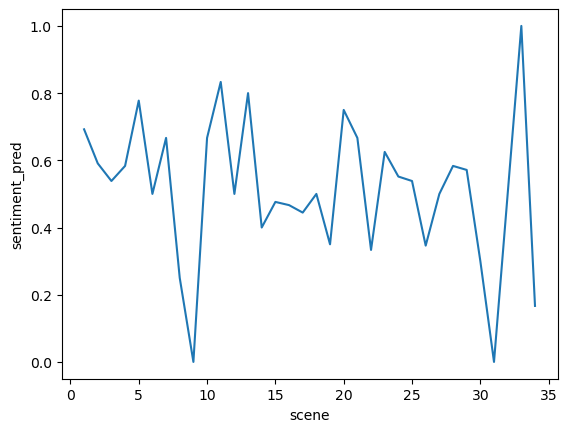

In [89]:
scene = pd.DataFrame(hapot_filter.groupby('scene', as_index=False).sentiment_pred.mean())
sns.lineplot(x='scene', y='sentiment_pred', data=scene)
plt.show()

In [98]:
import matplotlib.pyplot as plt

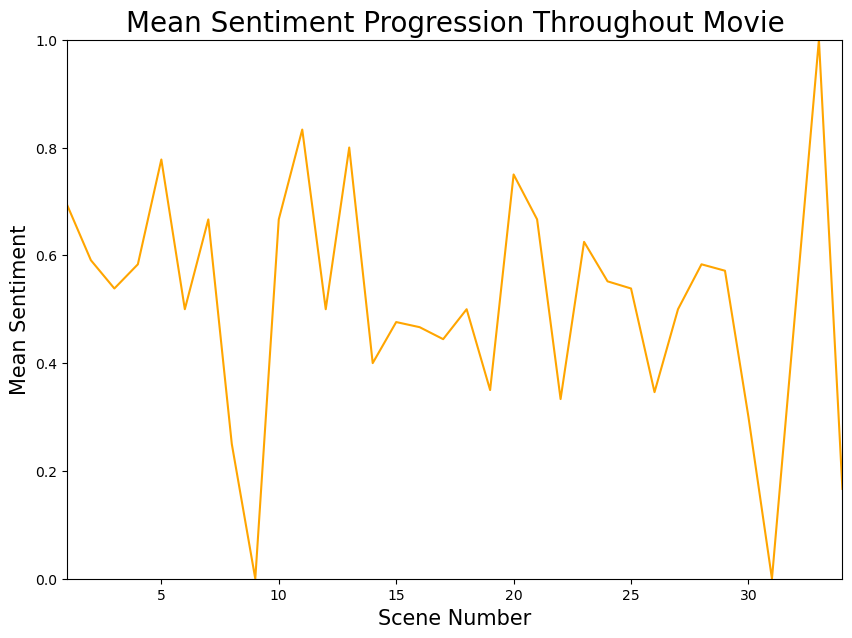

In [103]:
scene = pd.DataFrame(hapot_filter.groupby('scene', as_index=False).sentiment_pred.mean())
plt.figure(figsize=(10,7))
sns.lineplot(x='scene', y='sentiment_pred', data=scene, color='orange')
plt.xlabel('Scene Number', fontsize=15)
plt.ylabel('Mean Sentiment', fontsize=15)
plt.title('Mean Sentiment Progression Throughout Movie', fontsize=20)
plt.ylim(0,1)
plt.xlim(1,34)
plt.show()